Load the old dataset

In [7]:
import numpy as np
import os

from portiloopml.portiloop_python.ANN.wamsley_utils import detect_wamsley

subsets = ['01', '02', '03', '05']
data_path = '/project/MASS/mass_spindles_dataset'
new_data_path = '/project/MASS/mass_spindles_dataset_fix'

all_subjects = []

def read_data(path):
    data = np.load(path, allow_pickle=True)
    return data


# Open the necessary files and store them in a dictionary
for subset in subsets:
    subset = int(subset)
    data = read_data(os.path.join(
        data_path, f'mass_spindles_ss{subset}.npz'))
    # data_unloaded[subset] = data
    data_out = {}

    for subject in data:
        item = data[subject].item()
        # Load the signal and the annotations 
        signal_raw = item['signal_mass']
        signal_filt = item['signal_filt']
        ss_labels = item['ss_label']

        spindle_mass_fixed = {
            subject: {
                'onsets': [],
                'offsets': [],
                'labels_num': []
            }
        }
        
        spindle_filt_fixed = {
            subject: {
                'onsets': [],
                'offsets': [],
                'labels_num': []
            }
        }

        # Annotate using the fixed Wamsley
        mask = (ss_labels == 1) | (ss_labels == 2)

        spindles_mass = detect_wamsley(signal_raw, mask, fixed=True)[0]

        spindle_filt = detect_wamsley(signal_filt, mask, fixed=True)[0]

        for spindle in spindles_mass:
            spindle_mass_fixed[subject]['onsets'].append(spindle[0])
            spindle_mass_fixed[subject]['offsets'].append(spindle[2])
            spindle_mass_fixed[subject]['labels_num'].append(1)

        for spindle in spindle_filt:
            spindle_filt_fixed[subject]['onsets'].append(spindle[0])
            spindle_filt_fixed[subject]['offsets'].append(spindle[2])
            spindle_filt_fixed[subject]['labels_num'].append(1)

        print(f"Subject {subject}: Length of spindles_mass: {len(spindles_mass)} | Length of spindle_filt: {len(spindle_filt)}")

        item['spindle_mass_fixed'] = spindle_mass_fixed
        item['spindle_filt_fixed'] = spindle_filt_fixed

        data_out[subject] = item

    np.savez_compressed(os.path.join(new_data_path, f"mass_spindles_ss{subset}.npz"), **data_out)

subjects = all_subjects

Subject 01-01-0001: Length of spindles_mass: 527 | Length of spindle_filt: 1046
Subject 01-01-0002: Length of spindles_mass: 201 | Length of spindle_filt: 405
Subject 01-01-0003: Length of spindles_mass: 498 | Length of spindle_filt: 747
Subject 01-01-0004: Length of spindles_mass: 348 | Length of spindle_filt: 382
Subject 01-01-0005: Length of spindles_mass: 298 | Length of spindle_filt: 540
Subject 01-01-0006: Length of spindles_mass: 343 | Length of spindle_filt: 449
Subject 01-01-0007: Length of spindles_mass: 507 | Length of spindle_filt: 667
Subject 01-01-0008: Length of spindles_mass: 195 | Length of spindle_filt: 376
Subject 01-01-0009: Length of spindles_mass: 326 | Length of spindle_filt: 465
Subject 01-01-0010: Length of spindles_mass: 522 | Length of spindle_filt: 794
Subject 01-01-0011: Length of spindles_mass: 323 | Length of spindle_filt: 656
Subject 01-01-0012: Length of spindles_mass: 251 | Length of spindle_filt: 305
Subject 01-01-0013: Length of spindles_mass: 104 | 

In [10]:
from portiloopml.portiloop_python.ANN.data.mass_data_new import MassDataset

dataset = MassDataset(new_data_path, 54, 42, 1, subjects=['01-01-0001'], use_filtered=False)

Time taken to load 01-01-0001: 0.9730644226074219
Time taken to create lookup table: 0.7257711887359619
Number of sampleable indices: 7638447
Number of spindle indexes: 84764
Number of spindles: 527
Number of N1 indexes: 517500
Number of N2 indexes: 3750000
Number of N3 indexes: 862500
Number of R indexes: 1305000
Number of W indexes: 450000


In [5]:
for point in dataset:
    print(point)
    break

(tensor([[[-1.2478e-02, -2.8466e+01, -2.5236e+01, -1.7622e+01,  7.0017e+00,
           2.0089e+01,  1.5792e+01, -9.1416e-01, -2.2388e+01, -2.5474e+01,
          -2.4053e+01, -2.1855e+01, -1.9221e+01, -1.6266e+01, -1.2712e+01,
          -8.0061e+00, -1.3394e+00,  7.0728e+00,  1.3895e+01,  1.6213e+01,
           1.4583e+01,  9.5756e+00,  7.6621e-01, -1.0004e+01, -1.6200e+01,
          -1.6464e+01, -1.3022e+01, -7.0940e+00, -6.3600e-02,  5.4643e+00,
           7.5840e+00,  6.9179e+00,  5.2791e+00,  4.2625e+00,  4.6174e+00,
           5.8481e+00,  6.9254e+00,  7.1232e+00,  6.3126e+00,  4.7923e+00,
           2.9504e+00,  1.0529e+00, -8.6896e-01, -2.8805e+00, -4.8913e+00,
          -6.4124e+00, -6.8807e+00, -6.1324e+00, -4.3342e+00, -2.0285e+00,
          -1.2880e-01,  4.9060e-01, -4.1257e-01, -2.2122e+00]]]), {'spindle_label': tensor(0.), 'age': 57, 'gender': 'F', 'subject': '01-01-0001', 'sleep_stage': 5})


In [2]:
import numpy as np
import os

from portiloopml.portiloop_python.ANN.wamsley_utils import detect_lacourse

subsets = ['01', '02', '03', '05']
data_path = '/project/MASS/mass_spindles_dataset'
new_data_path = '/project/MASS/mass_spindles_dataset_lacourse'

all_subjects = []

def read_data(path):
    data = np.load(path, allow_pickle=True)
    return data


# Open the necessary files and store them in a dictionary
for subset in subsets:
    subset = int(subset)
    data = read_data(os.path.join(
        data_path, f'mass_spindles_ss{subset}.npz'))
    # data_unloaded[subset] = data
    data_out = {}

    for subject in data:
        item = data[subject].item()
        # Load the signal and the annotations 
        signal_raw = item['signal_mass']
        ss_labels = item['ss_label']

        spindle_mass_lacourse = {
            subject: {
                'onsets': [],
                'offsets': [],
                'labels_num': []
            }
        }

        # Annotate using the fixed Wamsley
        mask = (ss_labels == 1) | (ss_labels == 2)

        spindles_mass = detect_lacourse(signal_raw, mask)

        for spindle in spindles_mass:
            spindle_mass_lacourse[subject]['onsets'].append(spindle[0])
            spindle_mass_lacourse[subject]['offsets'].append(spindle[2])
            spindle_mass_lacourse[subject]['labels_num'].append(1)

        print(f"Subject {subject}: Length of Lacourse Spindles: {len(spindles_mass)}")

        item['spindle_mass_lacourse'] = spindle_mass_lacourse

        data_out[subject] = item

    np.savez_compressed(os.path.join(new_data_path, f"mass_spindles_ss{subset}.npz"), **data_out)


Subject 01-01-0001: Length of Lacourse Spindles: 1269


In [1]:
from portiloopml.portiloop_python.ANN.data.mass_data_new import MassDataset

new_data_path = '/project/MASS/mass_spindles_dataset_lacourse'
dataset = MassDataset(new_data_path, 54, 42, 1, subjects=['01-01-0001'], use_filtered=False)

Time taken to load 01-01-0001: 5.977952003479004
Time taken to create lookup table: 0.9754083156585693
Number of sampleable indices: 7638447
Number of spindle indexes: 84764
Number of spindles: 527
Number of N1 indexes: 517500
Number of N2 indexes: 3750000
Number of N3 indexes: 862500
Number of R indexes: 1305000
Number of W indexes: 450000


In [8]:
import matplotlib.pyplot as plt

In [9]:
index = 0

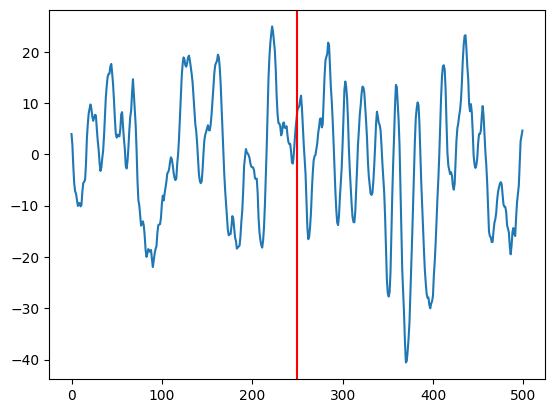

In [43]:
onset = dataset.data['01-01-0001']['spindle_mass_lacourse']['01-01-0001']['onsets'][index]
spindle = dataset.data['01-01-0001']['signal_mass'][onset-250:onset+250]
plt.plot(spindle)
plt.axvline(250, color='r')
plt.show()
index += 1